In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

abspath = os.path.abspath(os.getcwd())
finpath = Path(abspath).resolve().parent
parent_path = str(finpath) + '/data/'

train_file = parent_path + "train.csv"
train_data = pd.read_csv(train_file)

In [3]:
print(train_data.value_counts("Survived"))
print(train_data.value_counts("Sex"))
print(train_data.value_counts("Pclass"))
print(train_data.value_counts("Embarked"))
print(train_data.value_counts("SibSp"))

Survived
0    549
1    342
dtype: int64
Sex
male      577
female    314
dtype: int64
Pclass
3    491
1    216
2    184
dtype: int64
Embarked
S    644
C    168
Q     77
dtype: int64
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
dtype: int64


In [20]:
print(train_data.groupby("Sex").mean()["Survived"])
print(train_data.groupby("Pclass").mean()["Survived"])
print(train_data.groupby("Embarked").mean()["Survived"])
print(train_data.groupby("SibSp").mean()["Survived"])

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64
SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


In [58]:
dropped_data = train_data.dropna(axis=0)
nan_count = train_data.shape[0] - dropped_data.shape[0]
print('Missing data count: ', nan_count)
og_mean_surv = train_data["Survived"].mean()
new_mean_surv = dropped_data["Survived"].mean()
print('Original survival rate: ', og_mean_surv)
print('Survival rate after dropping missing data: ', new_mean_surv)
missing_mean_surv = (train_data.shape[0]*og_mean_surv - dropped_data.shape[0]*new_mean_surv) / nan_count
print('Survival rate of those with missing data: ', missing_mean_surv)


183
Missing data count:  708
Original survival rate:  0.3838383838383838
Survival rate after dropping missing data:  0.6721311475409836
Survival rate of those with missing data:  0.3093220338983051


Missing data count PassengerId: 0
Missing data count Survived: 0
Missing data count Pclass: 0
Missing data count Name: 0
Missing data count Sex: 0
Missing data count Age: 177
Missing data count SibSp: 0
Missing data count Parch: 0
Missing data count Ticket: 0
Missing data count Fare: 0
Missing data count Cabin: 687
Missing data count Embarked: 2


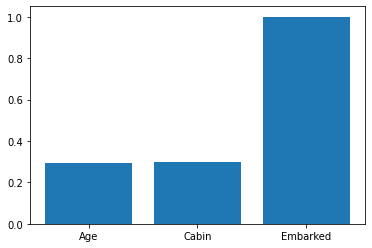

In [62]:
features = ["PassengerId", "Survived", "Pclass", "Name",
            "Sex", "Age", "SibSp", "Parch", "Ticket",
            "Fare","Cabin","Embarked"]
surv_dict = {}

for feature in features:
    dropped_data = train_data.dropna(subset=feature)
    nan_count = train_data.shape[0] - dropped_data.shape[0]
    print('Missing data count ' + feature + ':', nan_count)
    og_mean_surv = train_data["Survived"].mean()
    new_mean_surv = dropped_data["Survived"].mean()
    #print('Original survival rate: ', og_mean_surv)
    #print('Survival rate after dropping missing data: ', new_mean_surv)
    if nan_count > 0:
        missing_mean_surv = (train_data.shape[0]*og_mean_surv - dropped_data.shape[0]*new_mean_surv) / nan_count
        #print('Survival rate of those with missing data: ', missing_mean_surv)
        surv_dict[feature] = missing_mean_surv

X = list(surv_dict.keys())
y = list(surv_dict.values())

plt.bar(range(len(surv_dict)), y, tick_label=X)
plt.show()

In [65]:
for x in [["Age"], ["Cabin"], ["Age","Cabin"]]:
    dropped_data = train_data.dropna(subset=x)
    nan_count = train_data.shape[0] - dropped_data.shape[0]
    print('Missing data count ' + str(x) + ':', nan_count)
    og_mean_surv = train_data["Survived"].mean()
    new_mean_surv = dropped_data["Survived"].mean()
    print('Survival rate after dropping missing data: ' + str(x) + ':', new_mean_surv)
    if nan_count > 0:
        missing_mean_surv = (train_data.shape[0]*og_mean_surv - dropped_data.shape[0]*new_mean_surv) / nan_count
        print('Survival rate of those with missing data: ' + str(x) + ':', missing_mean_surv)

Missing data count ['Age']: 177
Survival rate after dropping missing data: ['Age']: 0.4061624649859944
Survival rate of those with missing data: ['Age']: 0.2937853107344633
Missing data count ['Cabin']: 687
Survival rate after dropping missing data: ['Cabin']: 0.6666666666666666
Survival rate of those with missing data: ['Cabin']: 0.29985443959243085
Missing data count ['Age', 'Cabin']: 706
Survival rate after dropping missing data: ['Age', 'Cabin']: 0.6756756756756757
Survival rate of those with missing data: ['Age', 'Cabin']: 0.3073654390934844


In [89]:
dropped_data = train_data.dropna(subset=["Cabin"])
print("Data after dropping missing cabins")
print(dropped_data.value_counts("Pclass"))
print(dropped_data.groupby("Pclass").mean()["Survived"])
print(dropped_data.value_counts("Sex"))
print(dropped_data.groupby("Sex").mean()["Survived"])
#print("Original Data")
#print(train_data.value_counts("Pclass"))
#print(train_data.groupby("Pclass").mean()["Survived"])
train_data_mod = train_data.fillna(value='NaN')
missing_data = train_data_mod[train_data_mod["Cabin"] == 'NaN']
print("Data of dropped observations")
print(missing_data.value_counts("Pclass"))
print(missing_data.groupby("Pclass").mean()["Survived"])
print(missing_data.value_counts("Sex"))
print(missing_data.groupby("Sex").mean()["Survived"])

Data after dropping missing cabins
Pclass
1    176
2     16
3     12
dtype: int64
Pclass
1    0.664773
2    0.812500
3    0.500000
Name: Survived, dtype: float64
Sex
male      107
female     97
dtype: int64
Sex
female    0.938144
male      0.420561
Name: Survived, dtype: float64
Data of dropped observations
Pclass
3    479
2    168
1     40
dtype: int64
Pclass
1    0.475000
2    0.440476
3    0.235908
Name: Survived, dtype: float64
Sex
male      470
female    217
dtype: int64
Sex
female    0.654378
male      0.136170
Name: Survived, dtype: float64


<AxesSubplot:xlabel='Age', ylabel='Count'>

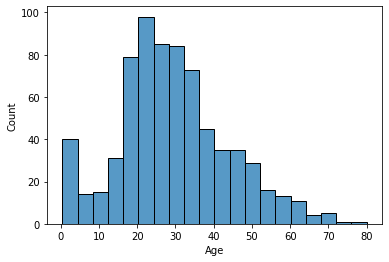

In [49]:
sns.histplot(train_data["Age"], bins=20)

[0.625, 0.75, 0.8571428571428571, 0.42857142857142855, 0.2, 0.4, 0.625, 0.43478260869565216, 0.38461538461538464, 0.3, 0.3076923076923077, 0.43478260869565216, 0.2857142857142857, 0.4186046511627907, 0.3829787234042553, 0.4594594594594595, 0.40625, 0.5365853658536586, 0.3333333333333333, 0.4074074074074074, 0.38095238095238093, 0.2857142857142857, 0.29411764705882354, 0.3888888888888889, 0.5625, 0.38461538461538464, 0.4444444444444444, 0.42857142857142855, 0.42857142857142855, 0.3333333333333333, 0.2857142857142857, 0.5, 0.0, nan, 0.0, 0.0, 0.0, nan, nan, 1.0]


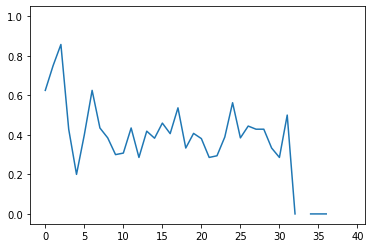

In [4]:
survival_lst = []
max_age = train_data["Age"].max()
bin_size = 2
urange = int(max_age // bin_size)
for x in range(urange):
    ub = (x + 1)*bin_size
    lb = x*bin_size
    survival_rate = train_data[(train_data["Age"] <= ub) & (train_data["Age"] > lb)]["Survived"].mean()
    survival_lst.append(survival_rate)
print(survival_lst)
plt.plot(survival_lst)

It seems clear now that whether someone has missing cabin data or not will play a large role in their potential to survive. Therefore, we will create a new column that indicates whether someone is missing cabin data or not within our dataframe and write it to our csvs. 

In [22]:
test_file = parent_path + "test.csv"
test_data = pd.read_csv(test_file)

train_data_mod = train_data.fillna(value='NaN')
miss_lst = []
for x in range(train_data_mod.shape[0]):
    if train_data_mod.iloc[x]["Cabin"] == "NaN":
        miss_lst.append(1)
    else:
        miss_lst.append(0)
train_data_mod["Missing Data"] = miss_lst
print(train_data_mod.value_counts("Missing Data"))

Missing Data
1    687
0    204
dtype: int64


In [23]:
train_data_mod = train_data_mod.set_index('PassengerId')

In [26]:
output_path = parent_path + "train_mod.csv"
train_data_mod.to_csv(output_path, index_label=False)